# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

Istogramma Frequenze Assolute

Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Formato audio non supportato: .DS_Store
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic Harassment Devices: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Acoustic release: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Echosounder: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Explosion: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._Fishing pinger: Formato audio non supportato: 
Errore durante la decodifica del file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._metadata-Target.csv: Formato audio non sup

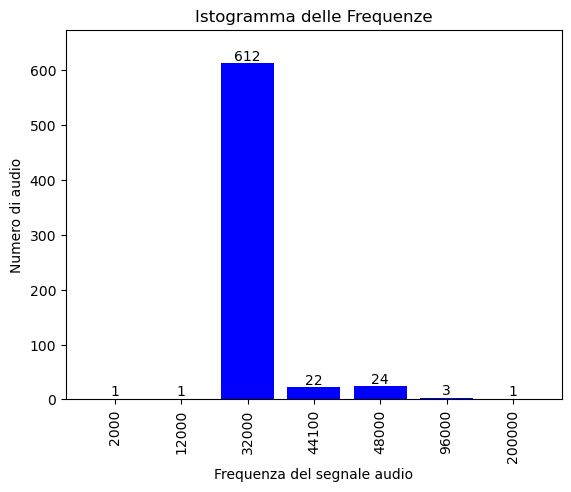

In [12]:
from Set_Data.Lettura_Freq import frequenze
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = frequenze()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation='vertical')

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import random

# Genera dati casuali per 700 file audio
file_names = [f"Audio_{i}" for i in range(700)]
durations_minutes = [random.uniform(0.5, 10) for _ in range(700)]  # Durata in minuti, casualmente tra 0.5 e 10 minuti

# Crea il DataFrame
df = px.data.tips()

# Crea il grafico a barre interattivo con Plotly Express
fig = px.bar(df, x=file_names, y=durations_minutes)

# Aggiungi le annotazioni delle durate effettive sulle barre
for i, duration in enumerate(durations_minutes):
    fig.add_annotation(
        x=file_names[i],
        y=duration,
        text=f"{int(duration)}:{int((duration - int(duration)) * 60):02}",  # Formatta la durata come minuti:secondi
        showarrow=False,
        font=dict(size=10),  # Dimensione del carattere dell'annotazione
    )

# Imposta il layout del grafico
fig.update_layout(
    title="Durata dei file audio",
    xaxis_title="Nome del file audio",
    yaxis_title="Durata dell'audio (minuti)",
    font=dict(size=18),
    width=1500,  # Larghezza del grafico
    height=800,  # Altezza del grafico
    margin=dict(l=50, r=50, t=100, b=100),  # Margine del grafico
    xaxis=dict(type='category', categoryorder='array', categoryarray=file_names),  # Imposta l'ordine degli assi x
    xaxis_rangeslider=dict(
        visible=True,  # Abilita la barra di navigazione inferiore
        range=[0, 20],  # Imposta il range iniziale per mostrare i primi 20 file
    ),
    bargap=0.2,  # Spazio tra le barre
)

fig.show()  # Mostra il grafico interattivo

In [9]:
import plotly.express as px
import plotly.graph_objects as go
from Set_Data.Lettura_Durata import audio_info  # Importa la funzione per ottenere le informazioni audio

# Ottieni le informazioni audio
audio_info_dict = audio_info()

# Estrai i nomi dei file e le durate
file_names = list(audio_info_dict.keys())
durations_minutes = [duration[0] + duration[1] / 60 for duration in audio_info_dict.values()]  # Durata in minuti

# Crea il DataFrame
df = px.data.tips()

# Crea il grafico a barre interattivo con Plotly Express
fig = px.bar(df, x=file_names, y=durations_minutes)

# Aggiungi le annotazioni delle durate effettive sulle barre
for i, duration in enumerate(durations_minutes):
    fig.add_annotation(
        x=file_names[i],
        y=duration,
        text=f"{int(duration)}:{int((duration - int(duration)) * 60):02}",  # Formatta la durata come minuti:secondi
        showarrow=False,
        font=dict(size=10),  # Dimensione del carattere dell'annotazione
    )

# Imposta il layout del grafico
fig.update_layout(
    title="Durata dei file audio",
    xaxis_title="Nome del file audio",
    yaxis_title="Durata dell'audio (minuti)",
    font=dict(size=18),
    width=1500,  # Larghezza del grafico
    height=800,  # Altezza del grafico
    margin=dict(l=50, r=50, t=100, b=100),  # Margine del grafico
    xaxis=dict(type='category', categoryorder='array', categoryarray=file_names),  # Imposta l'ordine degli assi x
    xaxis_rangeslider=dict(
        visible=True,  # Abilita la barra di navigazione inferiore
        range=[0, 20],  # Imposta il range iniziale per mostrare i primi 20 file
    ),
    bargap=0.2,  # Spazio tra le barre
)

fig.show()  # Mostra il grafico interattivo


Errore durante l'ottenimento delle informazioni audio per il file C:\Users\biagi\PycharmProjects\gruppo17\Dataset\Target\._.DS_Store: Decoding failed. ffmpeg returned error code: 3199971767

Output from ffmpeg/avlib:

ffmpeg version 7.0-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve 